Wenqing Zhu ml_project 

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set random seed
random.seed(16257960)

# Load data
data = pd.read_csv("musicData.csv")

#drop the first three columns
data = data.drop(data.columns[:3], axis=1)

### Preprocess Data

In [3]:
print("Missing values count for each variable:\n",data.isnull().sum())

Missing values count for each variable:
 popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64


Given that there are only 5 missing values in each variable, which is a relatively small number compared to the total dataset size, I can drop the missing values without losing much information. In this case, dropping the missing values would be a better choice than imputing the mean, as the impact on the overall data distribution will be minimal.

In [4]:
#drop missing values
data = data.dropna()
data.reset_index(drop=True, inplace=True)

import warnings
warnings.filterwarnings('ignore')

#check nan
print("Missing values count for each variable:\n",data.isnull().sum())

Missing values count for each variable:
 popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64


In [5]:
data.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [6]:
# Transform 'key' variable from string format to numerical format
data= pd.get_dummies(data,columns=['key'],prefix = 'key')

# Convert categorical data (mode) into numerical data using LabelEncoder
# minor->1; major->0 
mode_encoder = LabelEncoder()
data['mode'] = mode_encoder.fit_transform(data['mode'])

# Replace non-numeric values with NaN
data['tempo'] = pd.to_numeric(data['tempo'], errors='coerce')
# Since temp0 has many '?' or nan, Impute missing values with mean imputation
data["tempo"].fillna(data['tempo'].mean(), inplace=True)

In [7]:
# for obtained date
print(data['obtained_date'].unique()) 
print(data['obtained_date'].value_counts())
# as there is only one meaningless 0/4, as the date is a discrete var, so I replace it with mode
data['obtained_date'] = data['obtained_date'].replace('0/4', data['obtained_date'].mode()[0])
data= pd.get_dummies(data,columns=['obtained_date'],prefix = 'obtained_date')

['4-Apr' '3-Apr' '5-Apr' '1-Apr' '0/4']
4-Apr    44748
3-Apr     4067
5-Apr      784
1-Apr      400
0/4          1
Name: obtained_date, dtype: int64


In [8]:
data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_D#,key_E,key_F,key_F#,key_G,key_G#,obtained_date_1-Apr,obtained_date_3-Apr,obtained_date_4-Apr,obtained_date_5-Apr
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,1,0.0748,...,0,0,0,0,0,0,0,0,1,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,1,0.0300,...,0,0,0,0,0,0,0,0,1,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0,0.0345,...,0,0,0,0,0,1,0,0,1,0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0,0.2390,...,0,0,0,0,0,0,0,0,1,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0,0.0413,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,0,0.2980,...,0,0,0,0,0,0,0,0,1,0
49996,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,0,0.0550,...,0,0,0,0,0,0,0,0,1,0
49997,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,0,0.1460,...,0,0,0,0,0,0,0,0,1,0
49998,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,1,0.0441,...,0,0,0,0,1,0,0,0,1,0


In [9]:
print(data['music_genre'].unique())
genre_encoder = LabelEncoder()
# Transform the genre labels using the fitted encoder
data['music_genre'] = genre_encoder.fit_transform(data['music_genre'])

# display the correspondence between genre names and their numeric labels
for i, genre in enumerate(genre_encoder.classes_):
    print(f'{i}: {genre}')

['Electronic' 'Anime' 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop']
0: Alternative
1: Anime
2: Blues
3: Classical
4: Country
5: Electronic
6: Hip-Hop
7: Jazz
8: Rap
9: Rock


In [10]:
data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_D#,key_E,key_F,key_F#,key_G,key_G#,obtained_date_1-Apr,obtained_date_3-Apr,obtained_date_4-Apr,obtained_date_5-Apr
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,1,0.0748,...,0,0,0,0,0,0,0,0,1,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,1,0.0300,...,0,0,0,0,0,0,0,0,1,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0,0.0345,...,0,0,0,0,0,1,0,0,1,0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0,0.2390,...,0,0,0,0,0,0,0,0,1,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0,0.0413,...,0,0,0,1,0,0,0,0,1,0


### Dimensionality Reduction and Clustering:

In [11]:
# separate features from target variable
X = data.drop('music_genre', axis=1)
y = data['music_genre']

normalize_x = ['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness',
               'loudness', 'speechiness','tempo', 'valence']

# Scale the features
scaler = StandardScaler()
scaler.fit_transform(data[normalize_x])
data[normalize_x] = scaler.transform(data[normalize_x])

# Apply PCA
pca = PCA(n_components=2)  # or however many components you want to keep
X_pca = pca.fit_transform(X)

The optimal number of clusters is 3


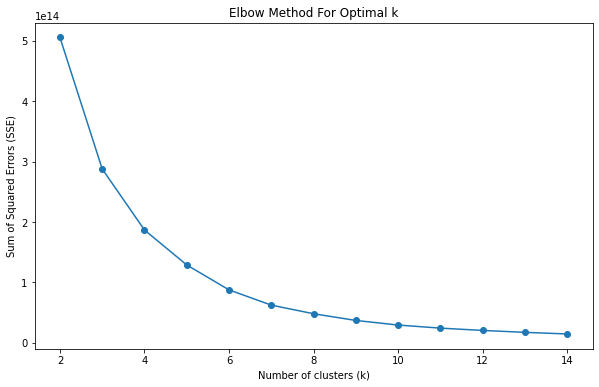

In [12]:
#clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
sse = []
k_values = range(2, 15)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=10)  
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    sse.append(kmeans.inertia_)


# find the k that gave the highest score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'The optimal number of clusters is {optimal_k}')

# plot SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=10)  # or however many clusters (genres) you have
clusters = kmeans.fit_predict(X)
klabels = kmeans.labels_
ksum = kmeans.inertia_

# Add the PCA components and clusters back into your DataFrame
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]
data['Cluster'] = clusters

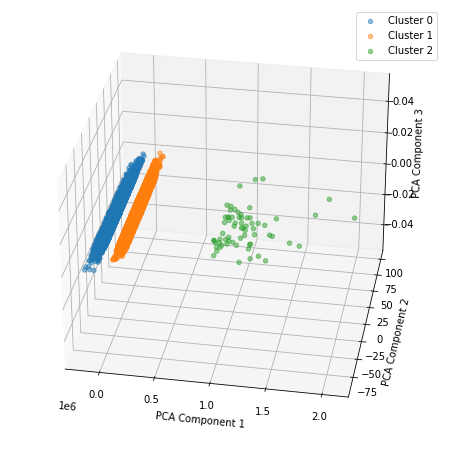

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster separately
for cluster in range(optimal_k):
    cluster_data = X_pca[clusters == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1],
               label=f'Cluster {cluster}', alpha=0.5)

# Set axis labels
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a legend
ax.legend()
elev_angle = 30  
azim_angle = -80
ax.view_init(elev=elev_angle, azim=azim_angle)
plt.show()

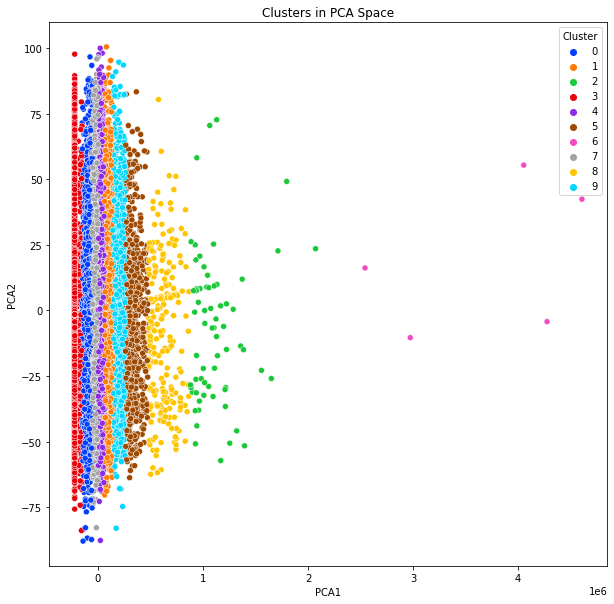

In [16]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='bright')
plt.title('Clusters in PCA Space')
plt.show()

### Train/Test Split

In [20]:
# Create empty lists to store the train and test data
train_data = []
test_data = []

# Iterate over each genre
for genre in data['music_genre'].unique():
    # Filter the data for the current genre
    genre_data = data[data['music_genre'] == genre]
    # Randomly select 500 songs for the test set
    test_songs = genre_data.sample(n=500, random_state=42)
    # Add the test songs to the test data list
    test_data.append(test_songs)
    # Exclude the test songs from the remaining data
    train_songs = genre_data.drop(test_songs.index)
    # Randomly select 4500 songs for the training set
    train_songs = train_songs.sample(n=4500, random_state=42)
    # Add the training songs to the train data list
    train_data.append(train_songs)

# Combine the train and test data for all genres
train_data = pd.concat(train_data)
test_data = pd.concat(test_data)

# Split the train and test data into X and y
X_train = train_data.drop('music_genre', axis=1)
y_train = train_data['music_genre']
X_test = test_data.drop('music_genre', axis=1)
y_test = test_data['music_genre']

# One-hot encode the genre labels
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

# Verify the train/test split
print("Train Data:")
print(X_train.shape)
print(y_train.value_counts())
print("\nTest Data:")
print(X_test.shape)
print(y_test.value_counts())
print(y_train_encoded)

Train Data:
(45000, 31)
5    4500
1    4500
7    4500
0    4500
4    4500
8    4500
2    4500
9    4500
3    4500
6    4500
Name: music_genre, dtype: int64

Test Data:
(5000, 31)
5    500
1    500
7    500
0    500
4    500
8    500
2    500
9    500
3    500
6    500
Name: music_genre, dtype: int64
       0  1  2  3  4  5  6  7  8  9
2596   0  0  0  0  0  1  0  0  0  0
4111   0  0  0  0  0  1  0  0  0  0
3327   0  0  0  0  0  1  0  0  0  0
3346   0  0  0  0  0  1  0  0  0  0
534    0  0  0  0  0  1  0  0  0  0
...   .. .. .. .. .. .. .. .. .. ..
49921  0  0  0  0  0  0  1  0  0  0
45532  0  0  0  0  0  0  1  0  0  0
48452  0  0  0  0  0  0  1  0  0  0
49205  0  0  0  0  0  0  1  0  0  0
45974  0  0  0  0  0  0  1  0  0  0

[45000 rows x 10 columns]


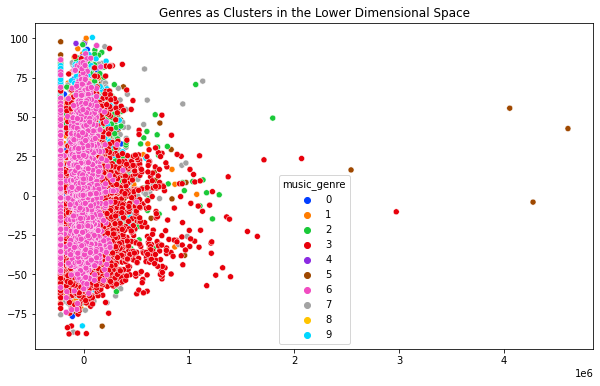

In [22]:
# Perform dimensionality reduction using PCA:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the genres as clusters in the lower dimensional space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="bright")
plt.title("Genres as Clusters in the Lower Dimensional Space")
plt.show()

### Model Selection and Training

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

# Create a list of classification models to compare
models = [
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()), 
    ('Neural Network', MLPClassifier())
]

# Iterate over the models and evaluate their performance
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)  # Perform 5-fold cross-validation
    print(f'{name}: Mean Accuracy = {scores.mean():.4f}, Standard Deviation = {scores.std():.4f}')


SVM: Mean Accuracy = 0.1625, Standard Deviation = 0.0026
Random Forest: Mean Accuracy = 0.5463, Standard Deviation = 0.0007
AdaBoost: Mean Accuracy = 0.4866, Standard Deviation = 0.0062
Neural Network: Mean Accuracy = 0.3311, Standard Deviation = 0.0487


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Create the OneVsRestClassifier using the Random Forest classifier
ovr_model = OneVsRestClassifier(rf_model)

# Train the model on the training data
ovr_model.fit(X_train, y_train_encoded)

# Predict the genres for the test data
y_pred_encoded = ovr_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Random Forest Model Accuracy: {accuracy:.4f}")


Random Forest Model Accuracy: 0.3252


### Model Evaluation

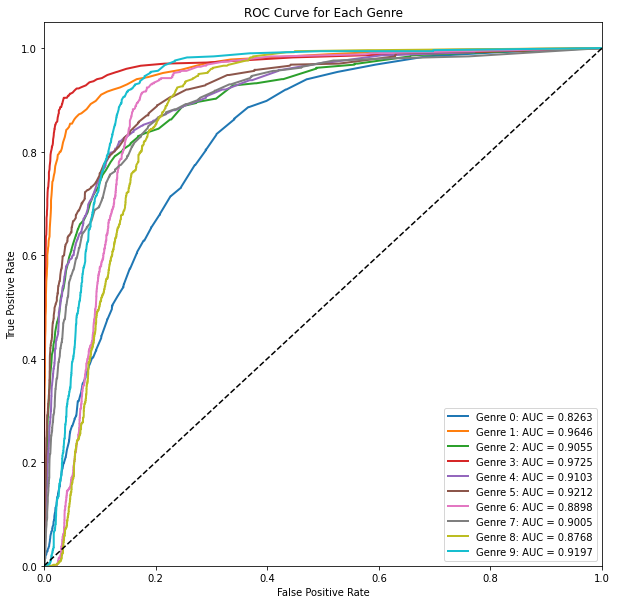

Overall AUC: 0.9087


In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate the probability scores for each class
y_score = ovr_model.predict_proba(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded.iloc[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_encoded.iloc[:, i], y_score[:, i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 10))
for i in range(y_test_encoded.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"Genre {i}: AUC = {roc_auc[i]:.4f}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Genre')
plt.legend(loc="lower right")
plt.show()

# Calculate the overall AUC by averaging the AUC values for all classes
overall_auc = sum(roc_auc.values()) / len(roc_auc)
print(f"Overall AUC: {overall_auc:.4f}")


### Extra Credit

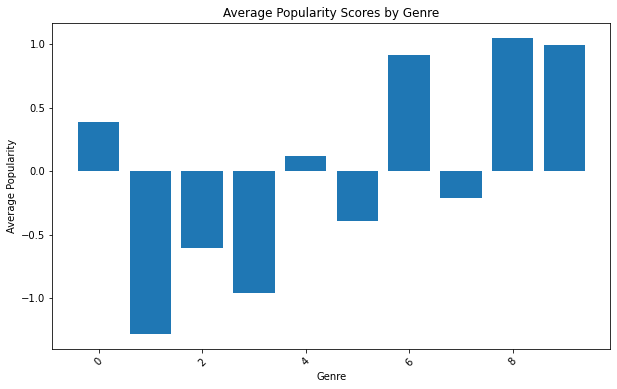

In [41]:
# Calculate the average popularity scores for each genre
average_popularity = data.groupby('music_genre')['popularity'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_popularity.index, average_popularity)
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity Scores by Genre')
plt.xticks(rotation=45)
plt.show()


In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create an SVM classifier with the "ovr" strategy
svm_model = SVC(decision_function_shape='ovr')

# Convert one-hot encoded labels back to original form
y_train_original = y_train_encoded.idxmax(axis=1)
y_test_original = y_test_encoded.idxmax(axis=1)

# Train the model on the training data
svm_model.fit(X_train, y_train_original)

# Predict the genres for the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
classification_rep = classification_report(y_test_original, y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.11      0.12       500
           1       0.18      0.41      0.25       500
           2       0.00      0.00      0.00       500
           3       0.19      0.32      0.24       500
           4       0.15      0.61      0.24       500
           5       0.00      0.00      0.00       500
           6       0.16      0.04      0.07       500
           7       0.13      0.08      0.10       500
           8       0.12      0.03      0.04       500
           9       0.00      0.00      0.00       500

    accuracy                           0.16      5000
   macro avg       0.11      0.16      0.11      5000
weighted avg       0.11      0.16      0.11      5000



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train the RandomForest classifier using the OneVsRest approach
forest = RandomForestClassifier(random_state=1)

# Perform cross-validation to evaluate the model's performance
scores = cross_val_score(forest, X_train, y_train_encoded, cv=5)
print(f"Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}")

# Fit the model on the training data
forest.fit(X_train, y_train_encoded)

# Predict the genre probabilities for the test set
y_score = forest.predict_proba(X_test)

# Compute ROC curve and ROC area for each genre
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded.iloc[:, i].values, y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_encoded.iloc[:, i].values, y_score[:, i])
    
# Plot the ROC curve for every genre
genre = ['Alternative', 'Anime', 'Blues', 'Classical', 'Country', 'Electronic', 'Hip-Hop', 'Jazz', 'Rap', 'Rock']
plt.figure(figsize=(10, 10))
for i in range(y_test_encoded.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"Genre: {genre[i]}: AUC = {roc_auc[i]:.4f}")

plt.plot([0, 1], [0, 1], 'k--')
y_pred = forest.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy for random forests model: {:.4f}".format(accuracy))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Genre (Random Forests Model)')
plt.legend(loc="lower right")
plt.show()


Mean Accuracy: 0.0000, Standard Deviation: 0.0000


TypeError: list indices must be integers or slices, not tuple

In [ ]:
# Train/test split
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for genre in data["music_genre"].unique():
    genre_data = data[data["music_genre"] == genre]
    train, test = train_test_split(genre_data, test_size=500)
    train_data = train_data.append(train)
    test_data = test_data.append(test)
    

# Separate features and target
X_train = train_data.drop(columns=["instance_id", "artist_name", "track_name", "popularity", "obtained_date", "music_genre"])
y_train = train_data["music_genre"]
X_test = test_data.drop(columns=["instance_id", "artist_name", "track_name", "popularity", "obtained_date", "music_genre"])
y_test = test_data["music_genre"]

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Perform dimensionality reduction using PCA:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the genres as clusters in the lower dimensional space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="bright")
plt.title("Genres as Clusters in the Lower Dimensional Space")
plt.show()

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Visualize the genres as clusters in the t-SNE reduced space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train, palette="bright")
plt.title("Genres as Clusters in the t-SNE Reduced Space")
plt.show()

In [ ]:
# Create and train the model
model = RandomForestClassifier(random_state=16257960)
model.fit(X_train_pca, y_train)

# Predict the probabilities
y_pred_proba = model.predict_proba(X_test_pca)

In [ ]:
# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
print(f"AUC: {auc}")

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true genre labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Plot ROC curve for each genre
for i, genre in enumerate(encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{genre} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Genre')
plt.legend(loc="lower right")
plt.show()